## IEEE-CIS Fraud Detection Dataset
https://www.kaggle.com/competitions/ieee-fraud-detection/overview

#### Training Data Set

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading and Exploration

In [9]:
train_identity = pd.read_csv('Data/train_identity.csv')
train_transaction = pd.read_csv('Data/train_transaction.csv')

train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

print(train_data.info())
print(train_data.isnull().sum().sort_values(ascending=False).head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
None
id_24    585793
id_25    585408
id_07    585385
id_08    585385
id_21    585381
id_26    585377
id_27    585371
id_23    585371
id_22    585371
dist2    552913
D7       551623
id_18    545427
D13      528588
D14      528353
D12      525823
id_04    524216
id_03    524216
D6       517353
id_33    517251
id_09    515614
dtype: int64


In [10]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


#### Data Cleaning and Preprocessing

In [15]:
train_data_sample = train_data.sample(frac=0.1, random_state=42)

# This handles missing values
numeric_features = train_data_sample.select_dtypes(include=[np.number]).columns
categorical_features = train_data_sample.select_dtypes(include=['object']).columns

# Impute missing values
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

train_data_sample[numeric_features] = numeric_imputer.fit_transform(train_data_sample[numeric_features])
train_data_sample[categorical_features] = categorical_imputer.fit_transform(train_data_sample[categorical_features])

train_data_sample = pd.get_dummies(train_data_sample, columns=categorical_features)

X = train_data_sample.drop(['isFraud', 'TransactionID'], axis=1)
y = train_data_sample['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####  Model Training and Evaluation

In [16]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

print("Random Forest Model Performance:")
print(classification_report(y_test, rf_predictions))

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

print("\nXGBoost Model Performance:")
print(classification_report(y_test, xgb_predictions))

Random Forest Model Performance:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     11364
         1.0       0.86      0.26      0.40       447

    accuracy                           0.97     11811
   macro avg       0.92      0.63      0.69     11811
weighted avg       0.97      0.97      0.96     11811



c:\Users\Henry\Vs Code Projects\Real-Time-Fraud-Detection-Pipeline\Real-Time-Fraud-Detection-Pipeline\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:30:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Performance:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11364
         1.0       0.82      0.40      0.53       447

    accuracy                           0.97     11811
   macro avg       0.90      0.70      0.76     11811
weighted avg       0.97      0.97      0.97     11811



#### Feature Importance Analysis

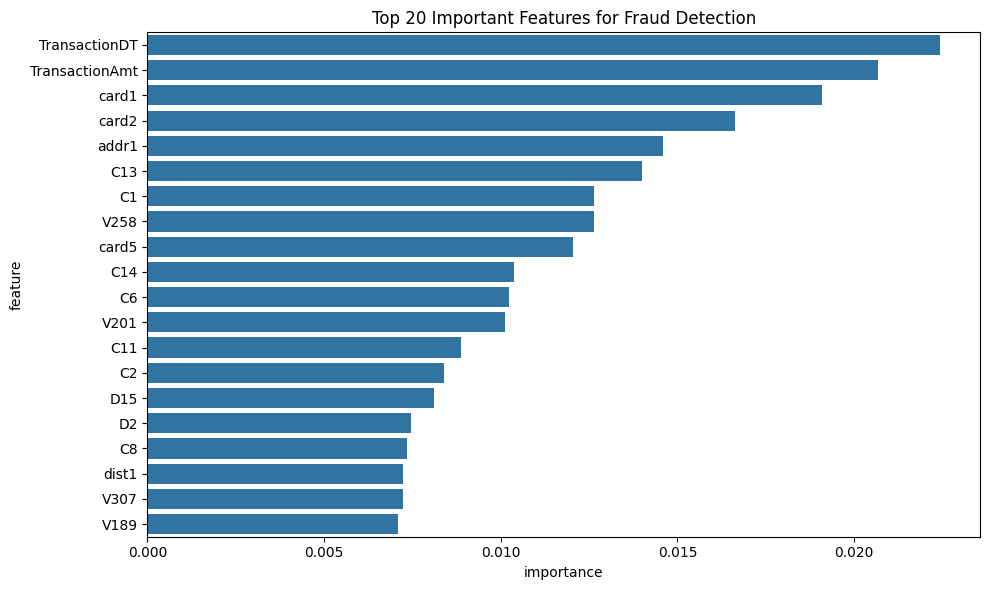

In [17]:
# Get feature importances from Random Forest model
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": rf_model.feature_importances_}
).sort_values("importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.head(20))
plt.title("Top 20 Important Features for Fraud Detection")
plt.tight_layout()
plt.show()

#### Model Tuning for Mobile Payments